In [1]:
import sys
sys.path.append('../../src/utils/')

from almaDatabaseQuery import *

import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [2]:
q = databaseQuery()

### Select Non-ALMACAL object
- min Time per Band: B3>60sec, B6>60sec, B7>60sec
- exclude Cylce0
- no minimum freq res

## report, resume = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    minTimeBand={3:60., 6:60., 7:60.}, \
                                    nonALMACAL = True, \
                                    silent=True)

### Sorted based on total integration in a Band

In [4]:
resume_sorted3 = sorted(resume, key=lambda data: data[11])
resume_sorted6 = sorted(resume, key=lambda data: data[12])
resume_sorted7 = sorted(resume, key=lambda data: data[13])
res3 = np.array(resume_sorted3)
res6 = np.array(resume_sorted6)
res7 = np.array(resume_sorted7)

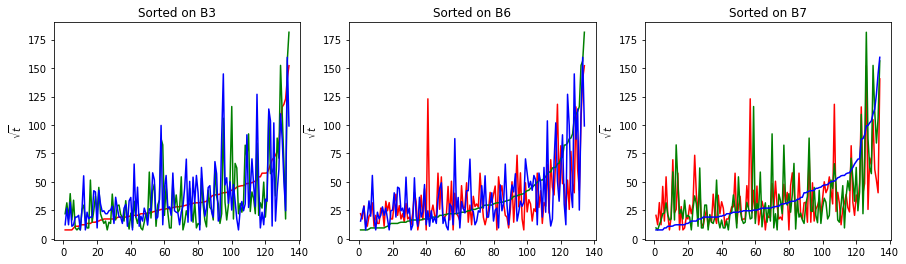

In [5]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.plot(np.linspace(1,134,134), np.sqrt(res3[:,11].astype(float)), 'r-', np.linspace(1,134,134), np.sqrt(res3[:,12].astype(float)), 'g-', np.linspace(1,134,134), np.sqrt(res3[:,13].astype(float)), 'b-')
plt.ylabel(r"$\sqrt{t}$")
plt.title("Sorted on B3")

plt.subplot(132)
plt.plot(np.linspace(1,134,134), np.sqrt(res6[:,11].astype(float)), 'r-', np.linspace(1,134,134), np.sqrt(res6[:,12].astype(float)), 'g-', np.linspace(1,134,134), np.sqrt(res6[:,13].astype(float)), 'b-')
plt.ylabel(r"$\sqrt{t}$")
plt.title("Sorted on B6")

plt.subplot(133)
plt.plot(np.linspace(1,134,134), np.sqrt(res7[:,11].astype(float)), 'r-', np.linspace(1,134,134), np.sqrt(res7[:,12].astype(float)), 'g-', np.linspace(1,134,134), np.sqrt(res7[:,13].astype(float)), 'b-')
plt.ylabel(r"$\sqrt{t}$")
plt.title("Sorted on B7")

### Sorted based on total integration in 3 Band (3+6+7)

In [6]:
resume_sorted = sorted(resume, key=lambda data: data[11]+data[12]+data[13])

In [7]:
res = np.array(resume_sorted)

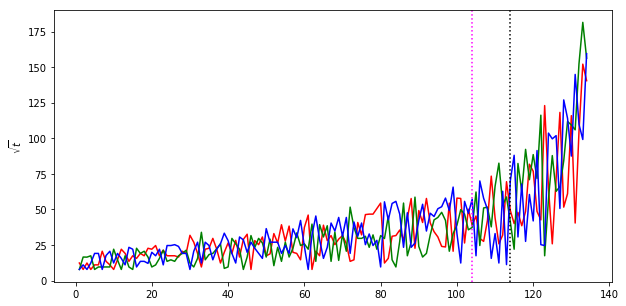

In [8]:
plt.figure(figsize=(10,5))

plt.plot(np.linspace(1,134,134), np.sqrt(res[:,11].astype(float)), 'r-', np.linspace(1,134,134), np.sqrt(res[:,12].astype(float)), 'g-', np.linspace(1,134,134), np.sqrt(res[:,13].astype(float)), 'b-')
plt.ylabel(r"$\sqrt{t}$")
plt.axvline(x=114, c='black', ls=':')
plt.axvline(x=104, c='magenta', ls=':')

- The correlation is seen on all plot, however the last plot has better variance (I think).
- we can used this as basis of 'cutting'.
- I make a cutting line in black and magenta (for 20 and 30 sample) which has largest total integration time.

In [9]:
print("List of primary sample: ")
primary_name = res[:,0][-20:]
print primary_name

List of primary sample: 
['J0541-0211' 'J1733-3722' 'J1610-3958' 'J1743-0350' 'J2253+1608'
 'J1851+0035' 'J0541-0541' 'J0601-7036' 'J1130-1449' 'J1305-4928'
 'J0336+3218' 'J0006-0623' 'J1717-3342' 'J1833-210B' 'J0237+2848'
 'J0750+1231' 'J1751+0939' 'J0948+0022' 'J1107-4449' 'J1256-0547']


In [10]:
print("List of secondary sample: ")
secondary_name = res[:,0][-30:-20]
print(secondary_name)

List of secondary sample: 
['J0747-3310' 'J1516+1932' 'J0438+3004' 'J2134-0153' 'J2226+0052'
 'J1830+0619' 'J0426+2327' 'J1626-2951' 'J1225+1253' 'J1058-8003']


See the detail of each object in `report_8_nonAlmacal.txt`

### Find alias name

* to find if any interesting/famous object

In [11]:
file_listcal = "alma_sourcecat_searchresults_20180419.csv"

In [12]:
listcal = q.read_calibratorlist(file_listcal, fluxrange=[0.1, 999999])

In [13]:
for i, obj in enumerate(primary_name):
    for j, cal in enumerate(listcal):
        if obj == cal[0]: # same name
            print(cal[3])

['J0541-0211', 'J054121-021108']
['J1733-3722', 'J1733-373', 'J173315-372232', 'B1729-373']
['J1610-3958', 'J161021-395857']
['J1743-0350', 'J1743-038', 'J174359-035006', 'B1741-038', 'VLA_J1743-0350']
['J2253+1608', 'J2253+161', 'J225358+160853', '3C454.3', 'B2251+158']
['J1851+0035', 'J1851+005', 'B1849+005', 'VLA_J1851+0035']
['J0541-0541', 'J0541-056', 'J054137-054147', 'J054138-054149', 'B0539-057']
['J0601-7036', 'J060106-703606']
['J1130-1449', 'J1130-148', 'J113007-144920', 'J113007-144927', 'B1127-145']
['J1305-4928', 'J130527-492804', 'J130527-492809']
['J0336+3218', 'J0336+323', 'J033630+321836', 'B0333+321', 'VLA_J0336+3218']
['J0006-0623', 'J0006-063', 'J000613-062334', 'J000613-062338', 'B0003-066']
['J1717-3342', 'J1717-337', 'J171736-334206', 'B1714-336']
['J1833-210B']
['J0237+2848', 'J0237+288', 'J023752+284814', 'B0234+285']
['J0750+1231', 'J0750+125', 'J075051+123113', 'B0748+126']
['J1751+0939', 'J1751+096', 'J175132+093858', 'B1749+096']
['J0948+0022', 'J0948+003'

There are 3C454.3 and 3C279

In [14]:
for i, obj in enumerate(secondary_name):
    for j, cal in enumerate(listcal):
        if obj == cal[0]: # same name
            print(cal[3])

['J0747-3310', 'J0747-331', 'J074719-331046', 'B0745-330']
['J1516+1932', 'J1516+195', 'J151657+193224', 'B1514+197', 'VLA_J1516+1932']
['J0438+3004', 'J0438+300', 'J043805+300446', 'B0434+299', 'VLA_J0438+3004']
['J2134-0153', 'J2134-018', 'J213410-015316', 'J213410-015325', 'B2131-021']
['J2226+0052', 'J2226+008', 'J222645+005159', 'B2224+006', 'VLA_J2226+0052']
['J1830+0619', 'J1830+063', 'B1827+062', 'VLA_J1830+0619']
['J0426+2327', 'J0426+234', 'J042655+232741', 'B0423+233', 'VLA_0426+234', 'VLA_J0426+2327']
['J1626-2951', 'J1626-298', 'J162606-295126', 'B1622-297']
['J1225+1253']
['J1058-8003', 'J105842-800346', 'B1057-797']


### Make a report only on this objects
- I add a new function

In [15]:
# List of nonalmacal sample (primary and secondary)
nonalmacal_priority = ['J0541-0211', 'J1733-3722', 'J1610-3958', 'J1743-0350', 'J2253+1608', 
              'J1851+0035', 'J0541-0541', 'J0601-7036', 'J1130-1449', 'J1305-4928',
              'J0336+3218', 'J0006-0623', 'J1717-3342', 'J1833-210B', 'J0237+2848', 
              'J0750+1231', 'J1751+0939', 'J0948+0022', 'J1107-4449', 'J1256-0547', 
              'J0747-3310', 'J1516+1932', 'J0438+3004', 'J2134-0153', 'J2226+0052', 
              'J1830+0619', 'J0426+2327', 'J1626-2951', 'J1225+1253', 'J1058-8003']

In [16]:
report, resume = q.make_report_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", nonalmacal_priority, \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    silent=True)

Number of source:  30


In [17]:
len(resume)

30

In [18]:
q.write_report(report, "report_8_nonALMACAL_priority.txt")

#################################
### Total Number of Sources : 30 

